# Students' Social Media Addiction  
Encuesta transnacional sobre patrones de uso, impacto académico y relaciones.

Fuente: https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships/data

### Acerca del conjunto de datos

El conjunto de datos "Redes sociales y relaciones estudiantiles" contiene registros anónimos del comportamiento de los estudiantes en redes sociales y sus resultados vitales. Abarca varios países y niveles académicos, centrándose en dimensiones clave como la intensidad de uso, las preferencias de plataforma y la dinámica de las relaciones. Cada fila representa la respuesta de un estudiante a la encuesta.

### Alcance y cobertura

Población: Estudiantes de 16 a 25 años matriculados en programas de secundaria, pregrado o posgrado.
Geografía: Cobertura multipaís (p. ej., Bangladés, India, EE. UU., Reino Unido, Canadá, Australia, Alemania, Brasil, Japón, Corea del Sur). Periodo: Datos recopilados mediante una encuesta única en línea administrada durante el primer trimestre de 2025.

### Recopilación de datos y metodología

Diseño de la encuesta: Preguntas adaptadas de escalas validadas sobre adicción a las redes sociales (p. ej., la Escala de Adicción a las Redes Sociales de Bergen) e índices de conflicto de pareja.

Reclutamiento: Participantes reclutados a través de listas de correo de universidades y plataformas de redes sociales, garantizando la diversidad académica y nacional.

### Key Variables

- Student_ID	
- Age	Integer.
- Gender:	Categorical	“Male” or “Female”  
- Academic_Level:	Categorical	High School / Undergraduate / Graduate.  
- Country: Categorical	Country of residence.  
- Avg_Daily_Usage_Hours:	Float	Average hours per day on social media  
- Most_Used_Platform:	Categorical	Instagram, Facebook, TikTok, etc.  
- Affects_Academic_Performance:	Boolean	Self‐reported impact on academics (Yes/No)  
- Sleep_Hours_Per_Night:	Float	Average nightly sleep hours  
- Mental_Health_Score:	Integer	Self‐rated mental health (1 = poor to 10 = excellent)  
- Relationship_Status	Categorical:	Single / In Relationship / Complicated  
- Conflicts_Over_Social_Media:	Integer	Number of relationship conflicts due to social media  
- Addicted_Score:	Integer	Social Media Addiction Score: (1 = low to 10 = high)  

### Objetivo del Análisis

El estudio busca responder las siguientes preguntas.

¿El uso prolongado de las redes sociales afectan la salud mental de los estudiantes?  
¿El uso prolongado de las redes sociales afectan en diferente medida la salud mental de los estudiantes por genero?  
¿El uso prolongado de las redes sociales afectan las horas de sueño de los estudiantes?  
¿El uso de plataformas de video corto afectan la salud emocional de los estudiantes mas que otro tipo de plataformas?  


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

In [30]:
#Leer dataset

data = pd.read_csv('Students Social Media Addiction.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

De acuerdo a la informacion que ofrece el resumen del dataset, se observa que el archivo Students Social Media Addiction.csv se compone de 12 variables de 705 registros, no hay valores nulos.

In [31]:
# Vista previa de los datos.
data.head(15)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
8,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4


In [32]:
# Exploración de datos, conociendo valores únicos de cada variable.

for col in data.columns:
    if col != 'Student_ID':
        print(f"Columna: {col}")
        print(data[col].unique())
        print("-" * 15)

Columna: Age
[19 22 20 18 21 23 24]
---------------
Columna: Gender
['Female' 'Male']
---------------
Columna: Academic_Level
['Undergraduate' 'Graduate' 'High School']
---------------
Columna: Country
['Bangladesh' 'India' 'USA' 'UK' 'Canada' 'Australia' 'Germany' 'Brazil'
 'Japan' 'South Korea' 'France' 'Spain' 'Italy' 'Mexico' 'Russia' 'China'
 'Sweden' 'Norway' 'Denmark' 'Netherlands' 'Belgium' 'Switzerland'
 'Austria' 'Portugal' 'Greece' 'Ireland' 'New Zealand' 'Singapore'
 'Malaysia' 'Thailand' 'Vietnam' 'Philippines' 'Indonesia' 'Taiwan'
 'Hong Kong' 'Turkey' 'Israel' 'UAE' 'Egypt' 'Morocco' 'South Africa'
 'Nigeria' 'Kenya' 'Ghana' 'Argentina' 'Chile' 'Colombia' 'Peru'
 'Venezuela' 'Ecuador' 'Uruguay' 'Paraguay' 'Bolivia' 'Costa Rica'
 'Panama' 'Jamaica' 'Trinidad' 'Bahamas' 'Iceland' 'Finland' 'Poland'
 'Romania' 'Hungary' 'Czech Republic' 'Slovakia' 'Croatia' 'Serbia'
 'Slovenia' 'Bulgaria' 'Estonia' 'Latvia' 'Lithuania' 'Ukraine' 'Moldova'
 'Belarus' 'Kazakhstan' 'Uzbekistan

### Limpieza de datos y transformaciones.

In [33]:
# Validacion de registros duplicados

duplicados = data[data.duplicated()]
print(f"Número de filas duplicadas: {duplicados.shape[0]}")
duplicados.head()

Número de filas duplicadas: 0


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score


In [34]:
# Verificar tipos de datos mixtos en cada columna.

mixed_type_columns = []
for col in data.columns:
       
    unique_types = {type(x) for x in data[col].dropna().unique()}
    if len(unique_types) > 1:
            mixed_type_columns.append((col, unique_types))
            print(f"La variable '{col}' tiene tipos de datos mixtos: {unique_types}")
    
    if not mixed_type_columns:
        print(f"La variable '{col}' tiene un solo tipo de dato consistente!")


La variable 'Student_ID' tiene un solo tipo de dato consistente!
La variable 'Age' tiene un solo tipo de dato consistente!
La variable 'Gender' tiene un solo tipo de dato consistente!
La variable 'Academic_Level' tiene un solo tipo de dato consistente!
La variable 'Country' tiene un solo tipo de dato consistente!
La variable 'Avg_Daily_Usage_Hours' tiene un solo tipo de dato consistente!
La variable 'Most_Used_Platform' tiene un solo tipo de dato consistente!
La variable 'Affects_Academic_Performance' tiene un solo tipo de dato consistente!
La variable 'Sleep_Hours_Per_Night' tiene un solo tipo de dato consistente!
La variable 'Mental_Health_Score' tiene un solo tipo de dato consistente!
La variable 'Relationship_Status' tiene un solo tipo de dato consistente!
La variable 'Conflicts_Over_Social_Media' tiene un solo tipo de dato consistente!
La variable 'Addicted_Score' tiene un solo tipo de dato consistente!


Despues de que se verifico que el dataset no contiene valores nulos, filas duplicados o variables con varios tipos de datos, se llega a la conclusión de que no es necesario llevar a cabo un proceso de limpieza, por lo tanto se procede con la transformacion del dataset.
Este dataset recibio buenas criticas de un usuario de Kaggle por no tener inconsistencias.

Debido a que hay plataformas de redes sociales que no estan disponibles en todos los paises encuestados, se decidio categorizar en una nueva variable cada red social por su tipo con el fin de obtener precision en el análisis.

In [35]:
# Crear una columna que categoriza por tipo las plataformas más usadas.

def categorize_platform(platform):
    platform = str(platform).strip().lower()
    if platform in ['whatsapp', 'messenger', 'telegram', 'wechat']:
        return 'Messaging'
    elif platform in ['tiktok', 'snapchat', 'instagram']:
        return 'Short Videos'
    elif platform == 'youtube':
        return 'Long Videos'
    elif platform in ['facebook']:
        return 'Social Network'
    elif platform == 'twitter':
        return 'Microblogging'
    else:
        return 'Other'

data['Platform_Category'] = data['Most_Used_Platform'].apply(categorize_platform)

Se decide eliminar la variable Student_ID ya que se considera que no tiene relevancia en el análisis. Esta variable representa un consecutivo de cada registro del dataset.

In [36]:
# Eliminar la columna "Student_ID"

data = data.drop(columns=["Student_ID"])

Se decide validar la variable Country ya que se sospecha que la cantidad de registros difiere por pais.

In [37]:
# Mostrar frecuencia por pais de la variable Country.

pd.set_option('display.max_rows', 1000)
print(data['Country'].value_counts(dropna=False))

Country
India              53
USA                40
Canada             34
France             27
Mexico             27
Spain              27
Turkey             27
Ireland            27
Denmark            27
Switzerland        27
UK                 22
Japan              21
Italy              21
Russia             21
Bangladesh         20
Maldives           19
Sri Lanka          19
Nepal              19
Pakistan           19
China              16
Poland             16
Germany            14
Australia          14
South Korea        13
UAE                 8
Singapore           8
New Zealand         8
Brazil              8
Malaysia            8
Netherlands         8
Finland             8
Austria             1
Thailand            1
Philippines         1
Taiwan              1
Indonesia           1
Hong Kong           1
Israel              1
Egypt               1
Morocco             1
Vietnam             1
Belgium             1
Greece              1
Portugal            1
Sweden              1
No

<Axes: xlabel='Country'>

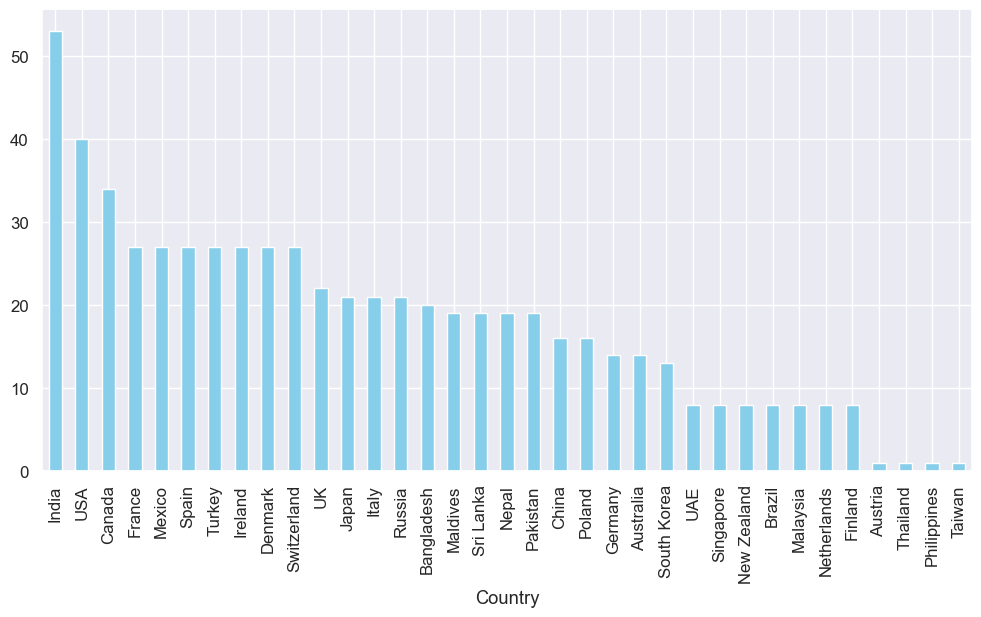

In [38]:
# Grafico de barras de frecuencias para la variable Country.

data['Country'].value_counts().head(35).plot(kind='bar', figsize=(12, 6), color='skyblue')

El análisis de la variable Country reveló una distribución de datos desigual, con la mayoría de los países representados por un solo registro.  Debido a esta limitación y a que el objetivo principal del estudio es examinar los comportamientos generales en lugar de las tendencias específicas por país, se ha tomado la decisión de excluir esta variable del análisis. Aunque la columna no será utilizada en el análisis de los datos, se mantendrá en el conjunto de datos original para conservar la integridad de la información y permitir futuras exploraciones si fuera necesario.



In [39]:
# Se Crea una columna con la agrupación de edades en 4 grupos entre 17 y 26 años
bins = [17, 19, 21, 23, 26]
labels = ['17-19', '20-21', '22-23', '24-26']
data['Categorized_Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True, include_lowest=True)
print(data['Categorized_Age_Group'].value_counts())

Categorized_Age_Group
20-21    321
22-23    181
17-19    177
24-26     26
Name: count, dtype: int64


In [40]:
# Se agrupan las horas de sueño en categorías.

bins = [0, 5, 7, 9, 24]
labels = ['Deficient', 'Insufficient', 'Healthy', 'Prolonged']
data['Categorized_Sleep_Hours_Group'] = pd.cut(data['Sleep_Hours_Per_Night'], bins=bins, labels=labels, right=True, include_lowest=True)

print(data['Categorized_Sleep_Hours_Group'].value_counts())

Categorized_Sleep_Hours_Group
Insufficient    341
Healthy         315
Deficient        36
Prolonged        13
Name: count, dtype: int64


In [41]:
# Se agrupa la variable Avg_Daily_Usage_Hours en categorías

bins = [0, 2, 3, 6, 24]
labels = ['Bajo', 'Moderado', 'Alto', 'Extremo']
data['Categorized_Usage_Hours_Group'] = pd.cut(data['Avg_Daily_Usage_Hours'], bins=bins, labels=labels, right=True, include_lowest=True)

print(data['Categorized_Usage_Hours_Group'].value_counts())

Categorized_Usage_Hours_Group
Alto        513
Extremo     143
Moderado     47
Bajo          2
Name: count, dtype: int64


In [42]:
data.head(20)

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Platform_Category,Categorized_Age_Group,Categorized_Sleep_Hours_Group,Categorized_Usage_Hours_Group
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,Short Videos,17-19,Insufficient,Alto
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,Microblogging,22-23,Healthy,Moderado
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,Short Videos,20-21,Deficient,Alto
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,Long Videos,17-19,Insufficient,Moderado
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,Social Network,20-21,Insufficient,Alto
5,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9,Short Videos,17-19,Deficient,Extremo
6,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2,Other,22-23,Healthy,Bajo
7,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8,Short Videos,20-21,Insufficient,Alto
8,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5,Short Videos,17-19,Insufficient,Alto
9,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4,Short Videos,20-21,Insufficient,Alto


## Análisis Exploratorio

### Estadística Descriptiva

Se quiere validar inicialmente cual es el tipo de plataforma que mas usan los encuestados. 

<Axes: xlabel='Platform_Category'>

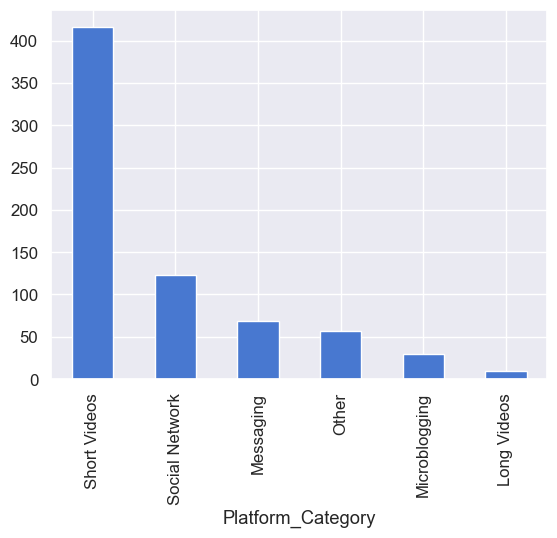

In [43]:
data['Platform_Category'].value_counts().plot(kind='bar')

Se observa que las plataformas mas usadas por los encuestados son aquellas de contenido viral como Instagrams, Tiktok y Facebook.

In [44]:
data.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


Validando los datos se observa que los estudiantes encuestados tienen una media de edad de 20 años. En promedio el 68% de los estudiantes usan plataformas de redes sociales entre 3.65 a 6.15 horas al día, con la mitad superior de los encuestados superando las 4.8 horas diarias. El media de horas de sueño de los estudiantes es de 6.8 horas una cifra inferior a la recomendada por la OMS. lo que sugiere una posible correlación entre el tiempo de pantalla y la privación de sueño.   
En términos de salud mental, la puntuación promedio de los estudiantes indica un estado moderado. De manera preocupante, la mitad de los encuestados presenta puntuaciones de adicción a redes sociales superiores a 7.

Se decidió no alterar los valores atípicos en las variables numéricas. Aunque estos datos pueden ser raros, se consideran representaciones válidas de comportamientos extremos dentro de los encuestados. Conservar estos valores atípicos es crucial para no perder información valiosa y reflejar la diversidad de la muestra.

In [45]:
# Descripción de las variables categóricas.

data[['Gender', 'Academic_Level', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status', 'Platform_Category', 'Categorized_Sleep_Hours_Group', 'Categorized_Usage_Hours_Group']].describe()

,Gender,Academic_Level,Most_Used_Platform,Affects_Academic_Performance,Relationship_Status,Platform_Category,Categorized_Sleep_Hours_Group,Categorized_Usage_Hours_Group
count,705,705,705,705,705,705,705,705
unique,2,3,12,2,3,6,4,4
top,Female,Undergraduate,Instagram,Yes,Single,Short Videos,Insufficient,Alto
freq,353,353,249,453,384,416,341,513


Al analizar las variables categoricas se observa que la mayoría de los encuestados no están en alguna relación sentimental, duermen horas insuficientes y tienen un alto consumo de redes sociales.

## Análisis univariado

In [46]:
# Eliminar las columnas Sleep_Hours_Group, Usage_Hours_Group y Age_Group
#data = data.drop(columns=['Sleep_Hours_Group', 'Usage_Hours_Group', 'Age_Group'])

C:\Users\Mateo\AppData\Local\Temp\ipykernel_16576\3616967707.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
C:\Users\Mateo\AppData\Local\Temp\ipykernel_16576\3616967707.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
C:\Users\Mateo\AppData\Local\Temp\ipykernel_16576\3616967707.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
C:\Users\Mateo\AppData\Local\Temp\ipykernel_16576\3616967707.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotat

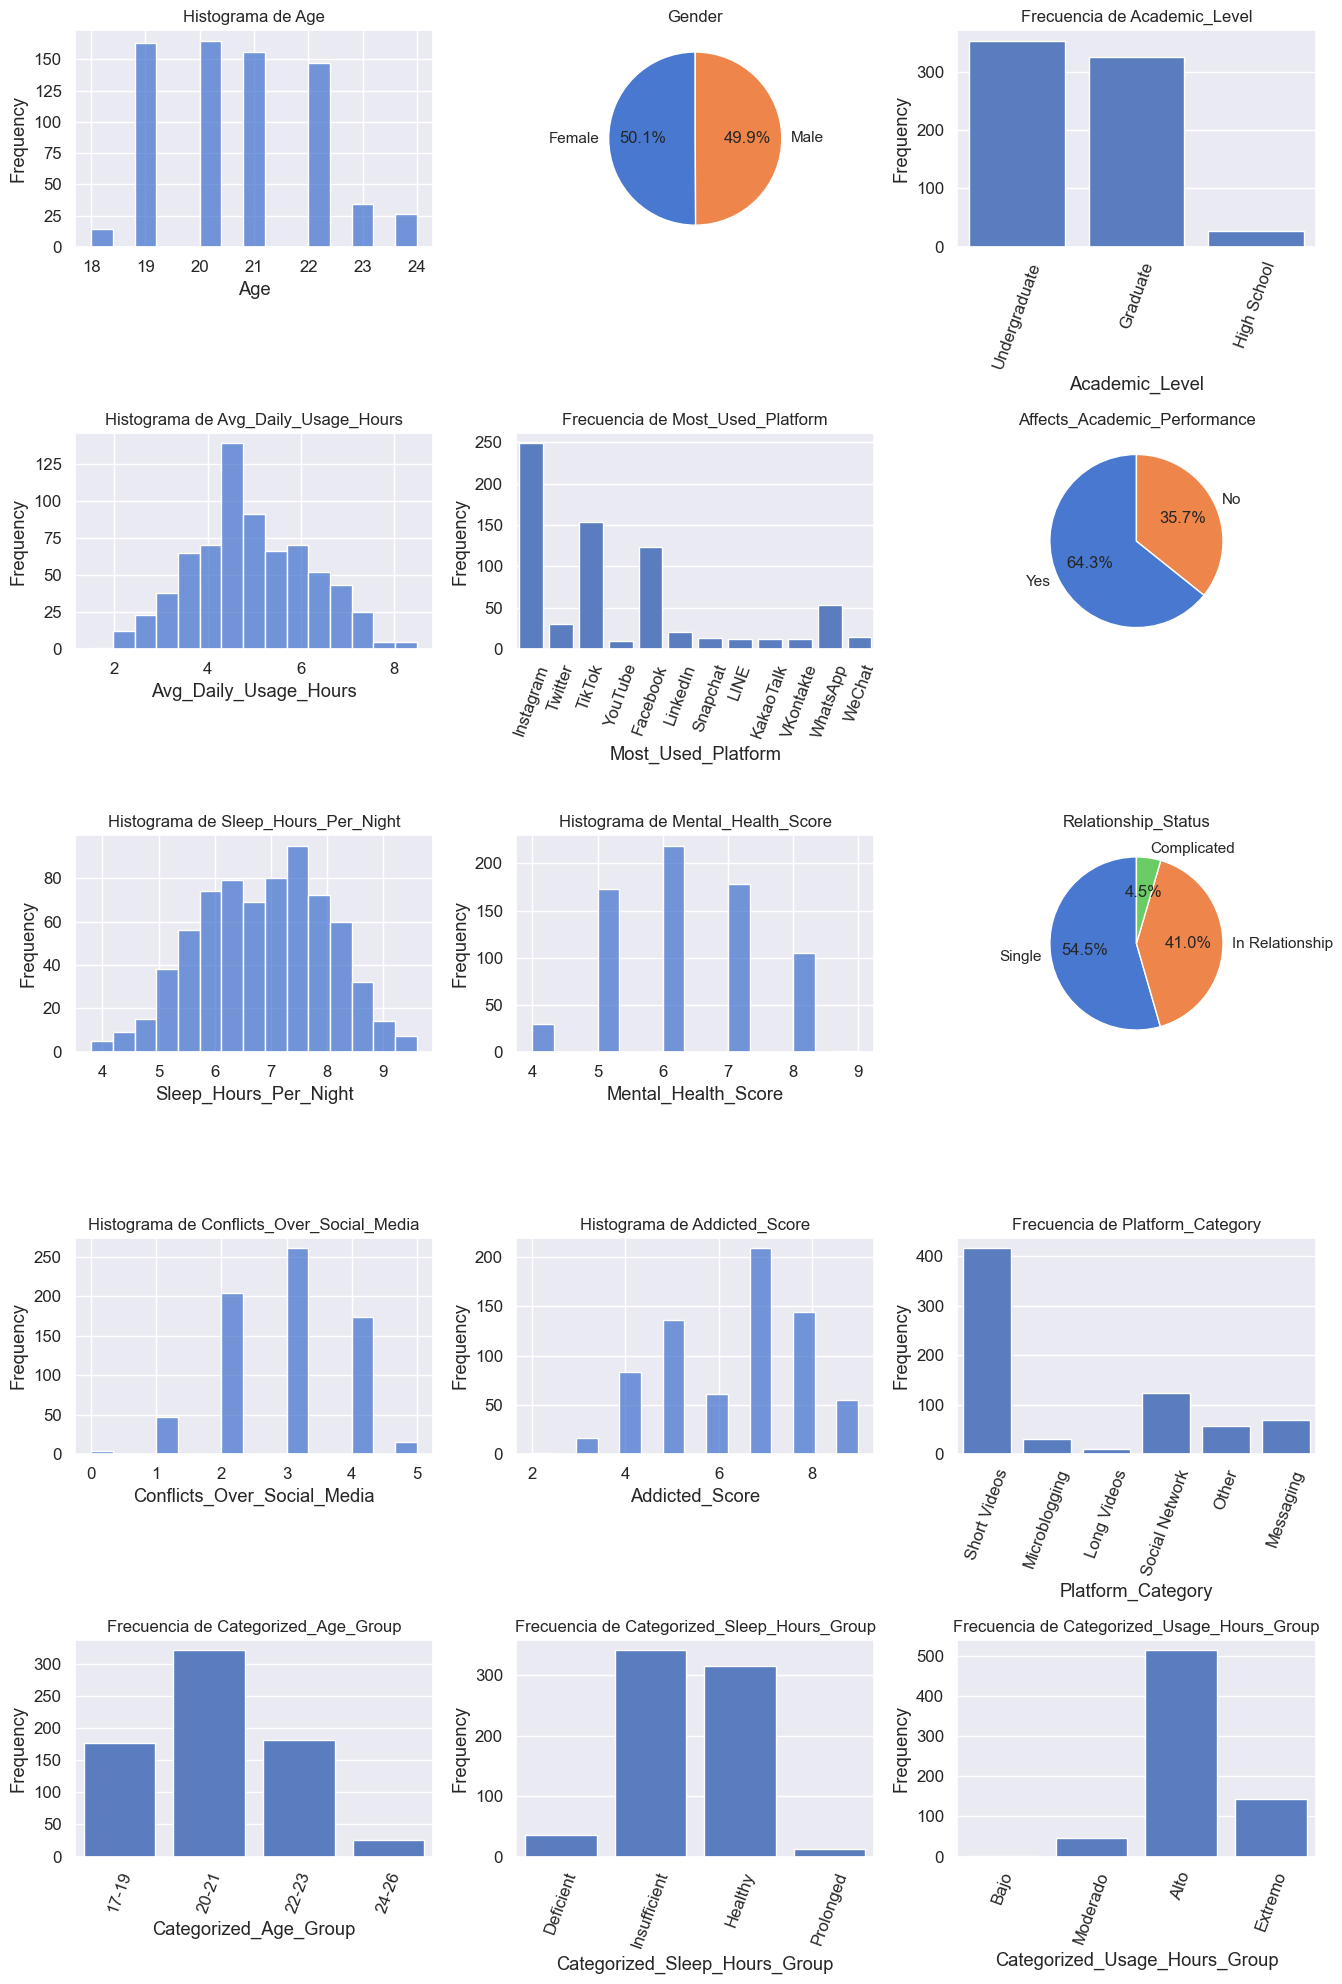

In [47]:
omit_cols = ['Country']

# Seleccionar columnas a graficar
cols_to_plot = [col for col in data.columns if col not in omit_cols]

pie_vars = ['Gender', 'Affects_Academic_Performance', 'Relationship_Status']

n_plots = len(cols_to_plot)
n_rows = math.ceil(n_plots / 3)
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(14, 4 * n_rows))
sns.set(style="darkgrid", palette="muted", font_scale=1.0)

for idx, col in enumerate(cols_to_plot):
    ax = axs.flatten()[idx]
    if col in pie_vars:
        data[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, startangle=90, colors=sns.color_palette("muted"))
        ax.set_ylabel('')
        ax.set_title(f'{col}')
    elif data[col].dtype == 'object' or data[col].dtype.name == 'category':
        sns.countplot(x=col, data=data, ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
        ax.set_title(f'Frecuencia de {col}')
    else:
        sns.histplot(data[col], bins=15, kde= False, ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Histograma de {col}')

# Ocultar subplots vacíos si hay
for j in range(idx + 1, n_rows * 3):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

Verificando las graficas de frecuencias de cada variable se puede agregar a los analisis anteriores  
-La mayoría de los encuentados son estudiantes universitarios y de posgrado.  

-La mayoría de ellos usan las plataformas de redes sociales por mas de 4 horas, lo que es un consumo alto.   

-El 64 .3% informa que el uso de las redes sociales afecta su desempeño académico.  

-En el histograma de puntajes de adiccion se observa un sesgo hacia la derecha,  lo que sugiere que la mayoría de los encuestados perciben tener problemas de adicción a las redes sociales.  

-Las plataformas de video corto  son unas de las plataformas de redes sociales más utilizadas por la gran mayoría de los estudiantes.

-De nuevo se observa en las graficas de Categorized_Sleep_Hours_Group y Categorized_Usage_Hours_Group que en la mayoría el consumo de horas en redes sociales es    alto y las horas de sueño no son las adecuadas.  

Para abordar la pregunta de investigación sobre las diferencias por género, el siguiente paso es realizar un análisis univariado por género. Esto permitirá determinar si las variables clave (salud mental, uso de redes sociales, horas de sueño y adicción) se comportan de manera distinta entre hombres y mujeres, validando así una de las preguntas del estudio.


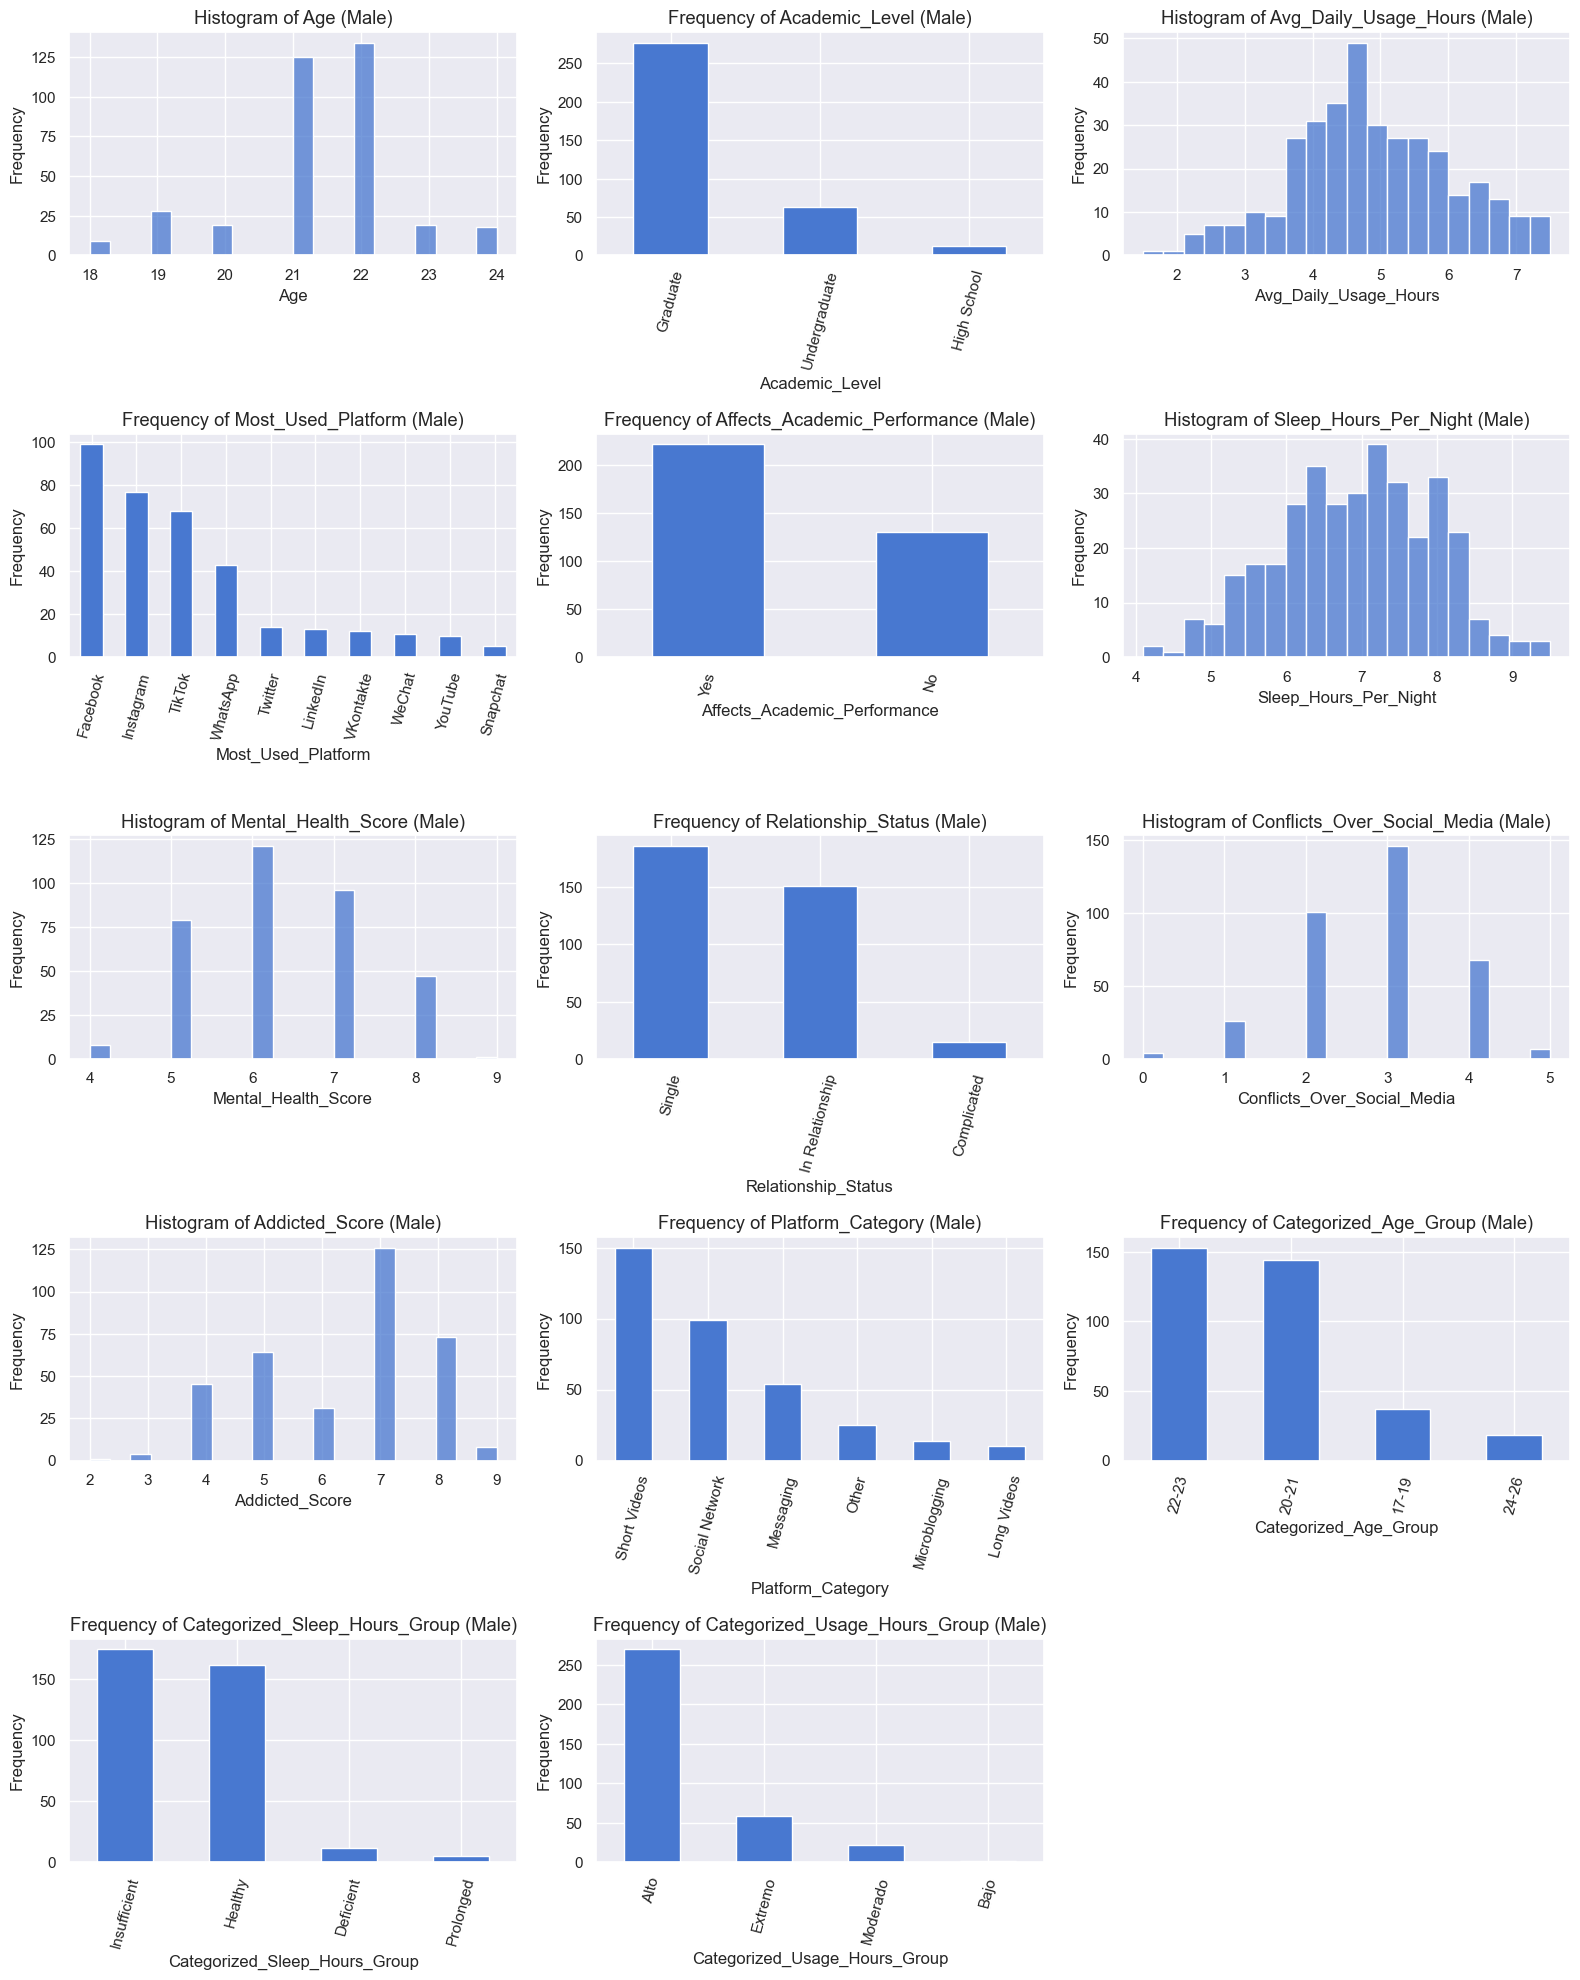

In [48]:
male_data = data[data['Gender'] == 'Male']

# Variables a comparar (excepto Gender)
vars_to_plot = [col for col in data.columns if col != 'Gender' and col != 'Country']

n_rows = math.ceil(len(vars_to_plot) / 3)
fig, axs = plt.subplots(n_rows, 3, figsize=(16, 4 * n_rows))
sns.set(style="darkgrid", palette="muted", font_scale=1.1)

for idx, col in enumerate(vars_to_plot):
    ax = axs.flatten()[idx]
    if male_data[col].dtype == 'object' or male_data[col].dtype.name == 'category':
        male_data[col].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(f'Frequency of {col} (Male)')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
    else:
        sns.histplot(male_data[col], bins=20, ax=ax)
        ax.set_title(f'Histogram of {col} (Male)')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        

# Ocultar subplots vacíos
for j in range(idx + 1, n_rows * 3):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

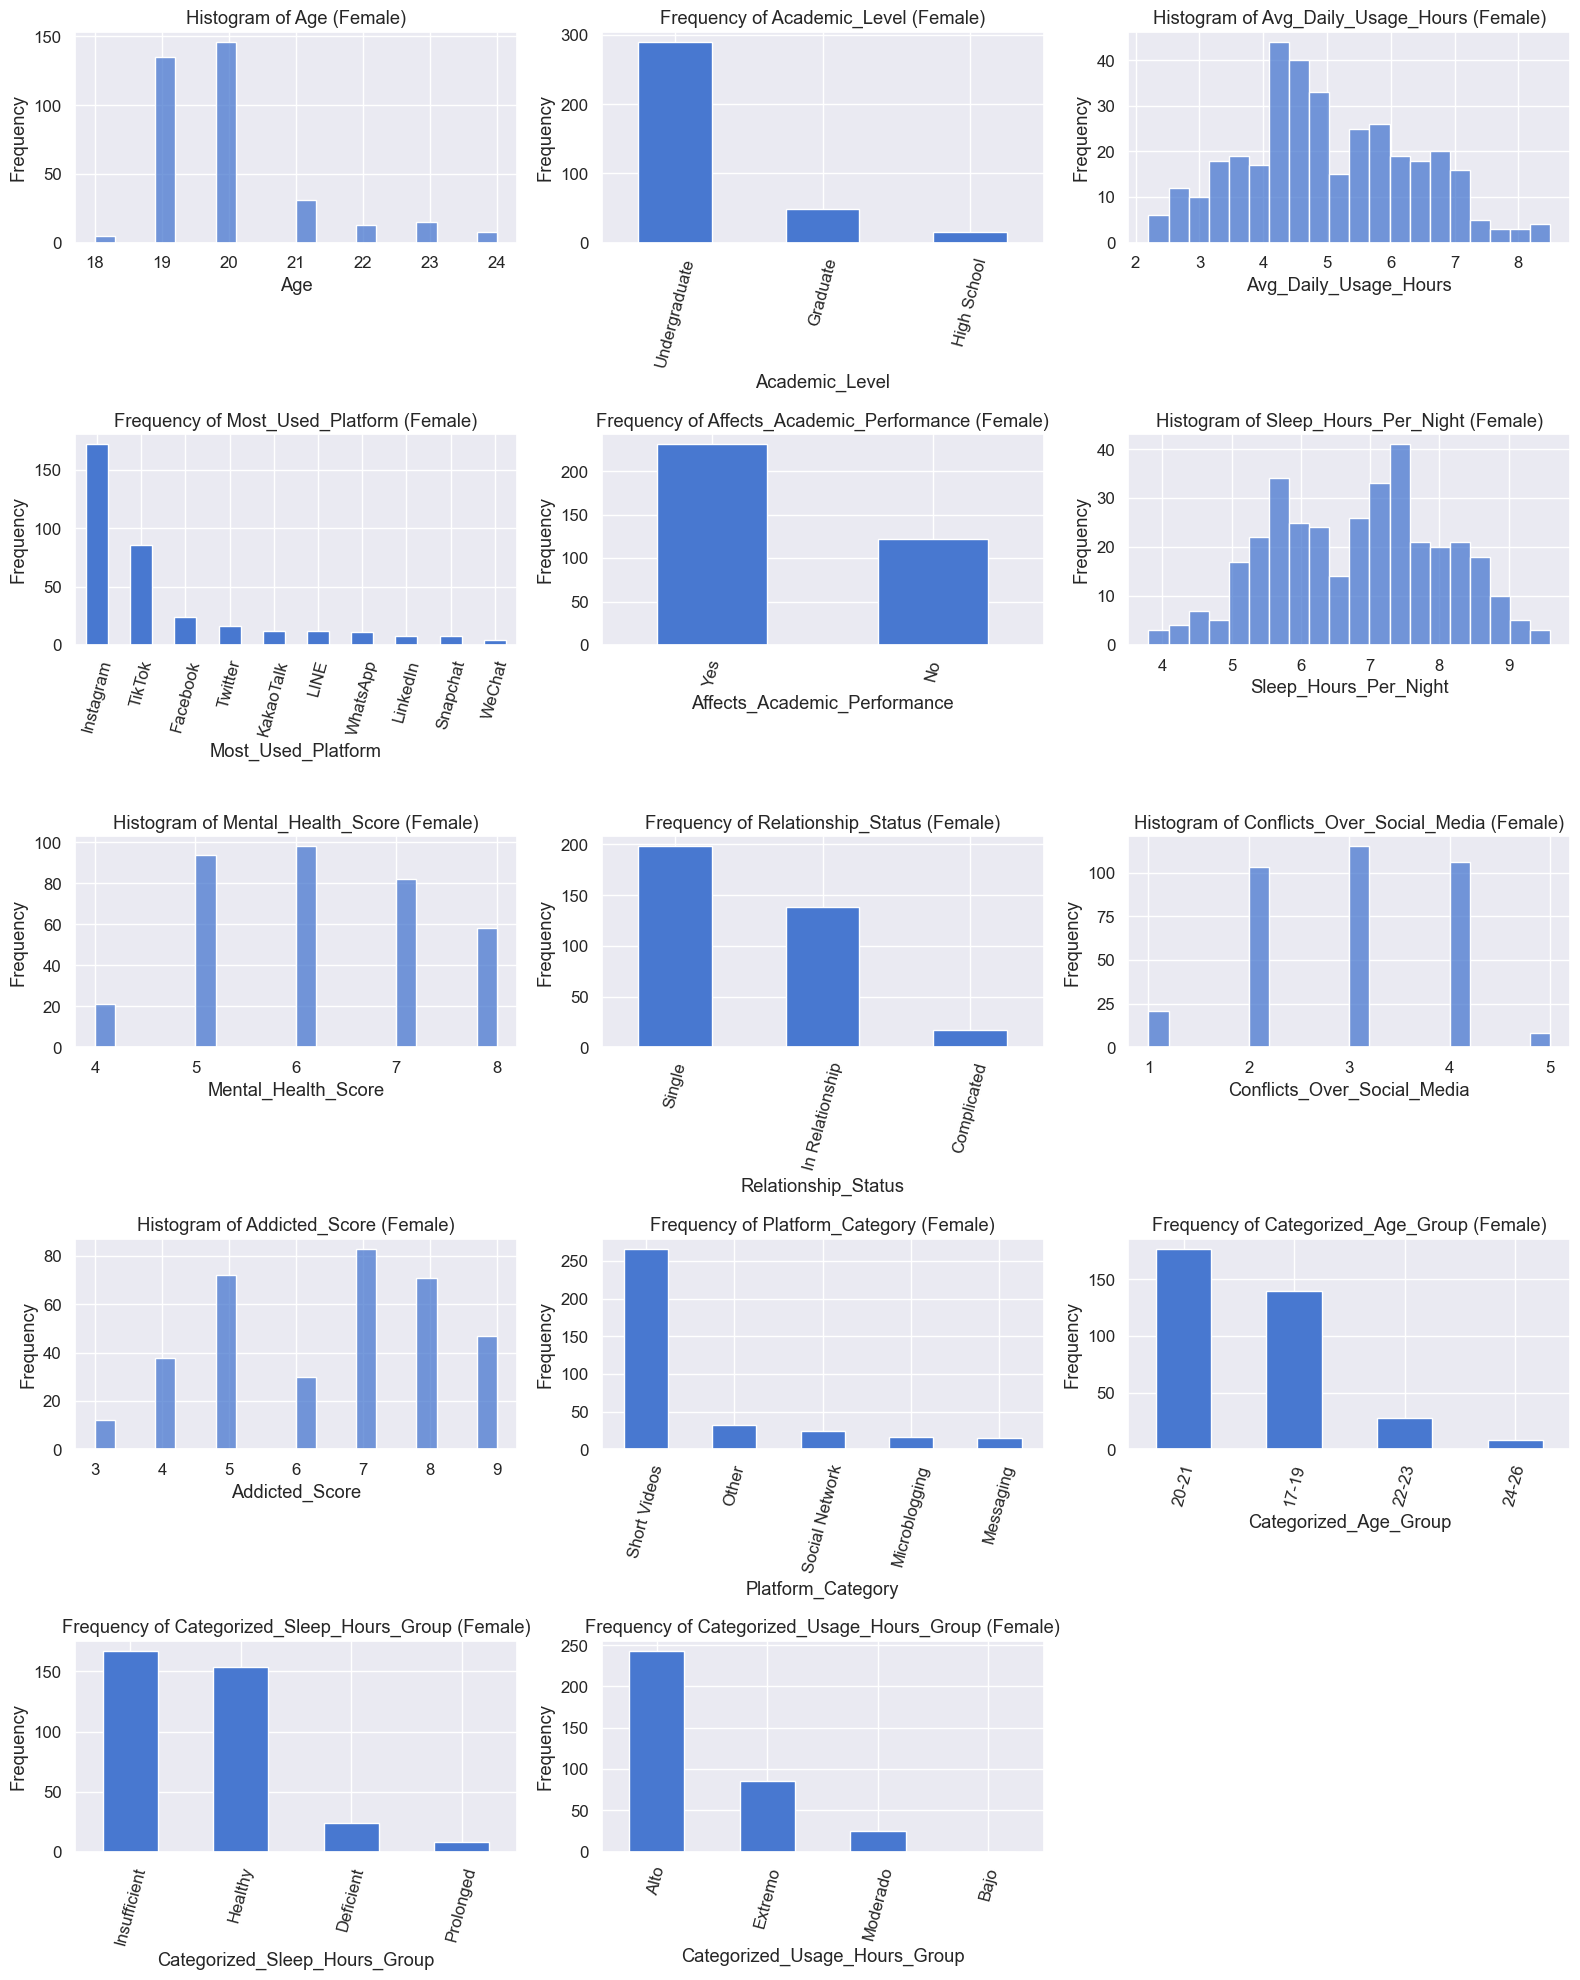

In [49]:
female_data = data[data['Gender'] == 'Female']

# Variables a comparar (excepto Gender)
vars_to_plot = [col for col in data.columns if col != 'Gender' and col != 'Country']

n_rows = math.ceil(len(vars_to_plot) / 3)
fig, axs = plt.subplots(n_rows, 3, figsize=(16, 4 * n_rows))
sns.set(style="darkgrid", palette="muted", font_scale=1.1)

for idx, col in enumerate(vars_to_plot):
    ax = axs.flatten()[idx]
    if female_data[col].dtype == 'object' or female_data[col].dtype.name == 'category':
        female_data[col].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(f'Frequency of {col} (Female)')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
    else:
        sns.histplot(female_data[col], bins=20, ax=ax)
        ax.set_title(f'Histogram of {col} (Female)')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

# Ocultar subplots vacíos
for j in range(idx + 1, n_rows * 3):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

C:\Users\Mateo\AppData\Local\Temp\ipykernel_16576\2919624563.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
C:\Users\Mateo\AppData\Local\Temp\ipykernel_16576\2919624563.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
C:\Users\Mateo\AppData\Local\Temp\ipykernel_16576\2919624563.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
C:\Users\Mateo\AppData\Local\Temp\ipykernel_16576\2919624563.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotat

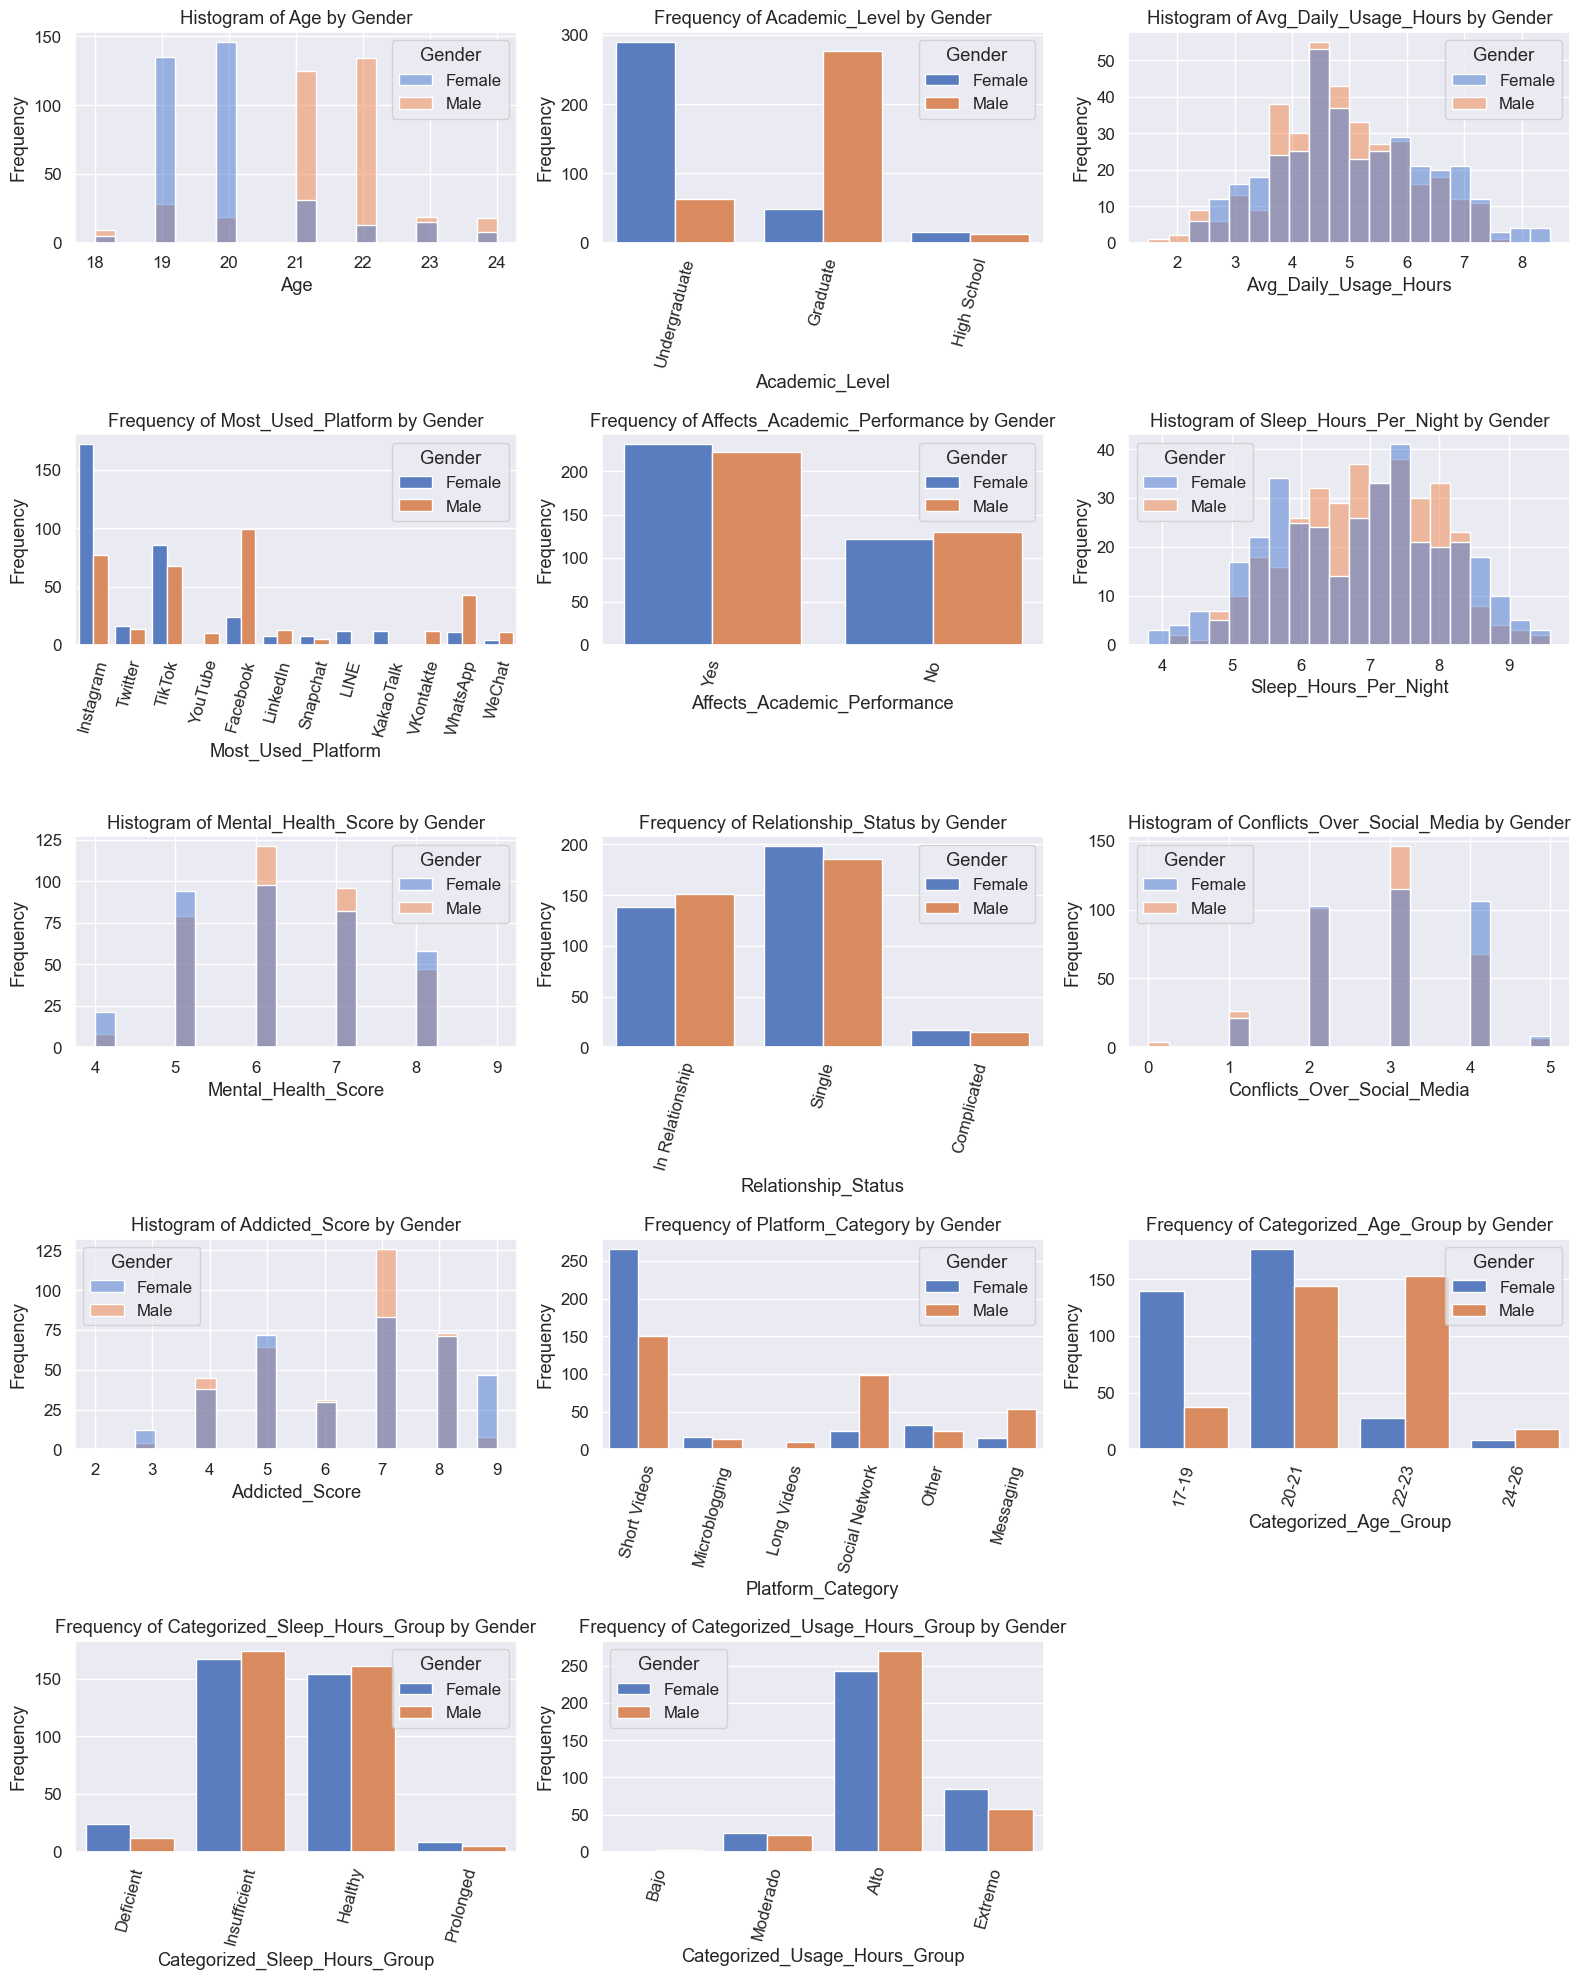

In [50]:
# Variables a comparar (excepto Gender y Country)
vars_to_plot = [col for col in data.columns if col not in ['Gender', 'Country']]

n_rows = math.ceil(len(vars_to_plot) / 3)
fig, axs = plt.subplots(n_rows, 3, figsize=(16, 4 * n_rows))
axs = axs.flatten()
sns.set(style="darkgrid", palette="muted", font_scale=1.1)

for idx, col in enumerate(vars_to_plot):
    ax = axs[idx]

    
    if data[col].dtype == 'object' or data[col].dtype.name == 'category':
        sns.countplot(x=col, hue='Gender', data=data, ax=ax)
        ax.set_title(f'Frequency of {col} by Gender')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
    
    
    else:
        sns.histplot(data=data, x=col, hue='Gender', kde=False, bins=20, ax=ax)
        ax.set_title(f'Histogram of {col} by Gender')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

# Ocultar subplots vacíos
if len(vars_to_plot) < len(axs):
    for j in range(len(vars_to_plot), len(axs)):
        axs[j].axis('off')

plt.tight_layout()
plt.show()

In [51]:
# Para analizar las diferencias en cada una de las vaiables por genero también se calculara el promedio por género y se hara la prueba de t-student para variables numéricas.

for i in data.columns:
    if data[i].dtype != 'object' and data[i].dtype.name != 'category':
        promedio_por_genero = data.groupby('Gender')[i].mean()
        print(f"Promedio de {i} por género:")
        print(promedio_por_genero)
        print(f"Asimetría = {data.groupby('Gender')[i].skew()}")
        t_statistic, p_value = stats.ttest_ind(data[data['Gender'] == 'Male'][i], data[data['Gender'] == 'Female'][i])
        print(f"T-student = {t_statistic}, p-valor = {p_value}")
        print("\n")


Promedio de Age por género:
Gender
Female    19.968839
Male      21.352273
Name: Age, dtype: float64
Asimetría = Gender
Female    1.556012
Male     -0.450674
Name: Age, dtype: float64
T-student = 15.093156034121488, p-valor = 8.57642509227011e-45


Promedio de Avg_Daily_Usage_Hours por género:
Gender
Female    5.011048
Male      4.826136
Name: Avg_Daily_Usage_Hours, dtype: float64
Asimetría = Gender
Female    0.215056
Male      0.021587
Name: Avg_Daily_Usage_Hours, dtype: float64
T-student = -1.956263728484681, p-valor = 0.05082968129313251


Promedio de Sleep_Hours_Per_Night por género:
Gender
Female    6.816147
Male      6.921875
Name: Sleep_Hours_Per_Night, dtype: float64
Asimetría = Gender
Female   -0.058759
Male     -0.126526
Name: Sleep_Hours_Per_Night, dtype: float64
T-student = 1.2461145407701848, p-valor = 0.2131374424158591


Promedio de Mental_Health_Score por género:
Gender
Female    6.175637
Male      6.278409
Name: Mental_Health_Score, dtype: float64
Asimetría = Gender
Fe

El análisis de género ha revelado que, en general, el impacto de las redes sociales es similar para hombres y mujeres. Los datos muestran que ambos géneros tienen patrones de comportamiento muy parecidos.

- Horas de Uso Diarias: Aunque las mujeres pasan un poco más de tiempo en redes sociales que los hombres, la prueba t de Student confirmó que esta diferencia no es estadísticamente significativa. La distribución del uso diario es muy parecida para ambos grupos.

- Horas de Sueño y Salud Mental: No se encontraron diferencias significativas en las horas de sueño o en el indicador de salud mental entre los géneros. Ambos grupos reportan patrones y niveles comparables en estas áreas.

- Puntuación de Adicción: Las mujeres presentan una puntuación promedio de adicción ligeramente superior. Sin embargo, al igual que con las horas de uso, la prueba t de Student mostró que esta diferencia no es estadísticamente significativa.

- Tipo de Plataformas: Se observó una diferencia notable: las mujeres usan más plataformas de video corto y viral que los hombres.

En conclusión, a pesar de algunas diferencias leves, el impacto de las redes sociales en el bienestar de los estudiantes es casi idéntico para ambos géneros.


## Análisis Bivariado  

El objetivo es identificar posibles correlaciones que aporten un valor significativo a la investigación. Para ello, se utilizarán gráficos y una matriz de correlación, lo que permitirá visualizar y cuantificar las conexiones entre el uso de redes sociales, el sueño, la salud mental y la adicción.
Unicamente se graficarán las variables que se consideran que aportan valor al análisis.



C:\Users\Mateo\AppData\Local\Temp\ipykernel_16576\83481398.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Most_Used_Platform', y='Avg_Daily_Usage_Hours', data=data, ax=axs[5], ci=None)
C:\Users\Mateo\AppData\Local\Temp\ipykernel_16576\83481398.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[5].set_xticklabels(axs[5].get_xticklabels(), rotation=90)
C:\Users\Mateo\AppData\Local\Temp\ipykernel_16576\83481398.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Academic_Level', y='Addicted_Score', data=data, ax=axs[6], ci=None)
C:\Users\Mateo\AppData\Local\Temp\ipykernel_16576\83481398.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Categorized_Usage_Hours_Group', y='Sleep_Hours_Per_Night', data=dat

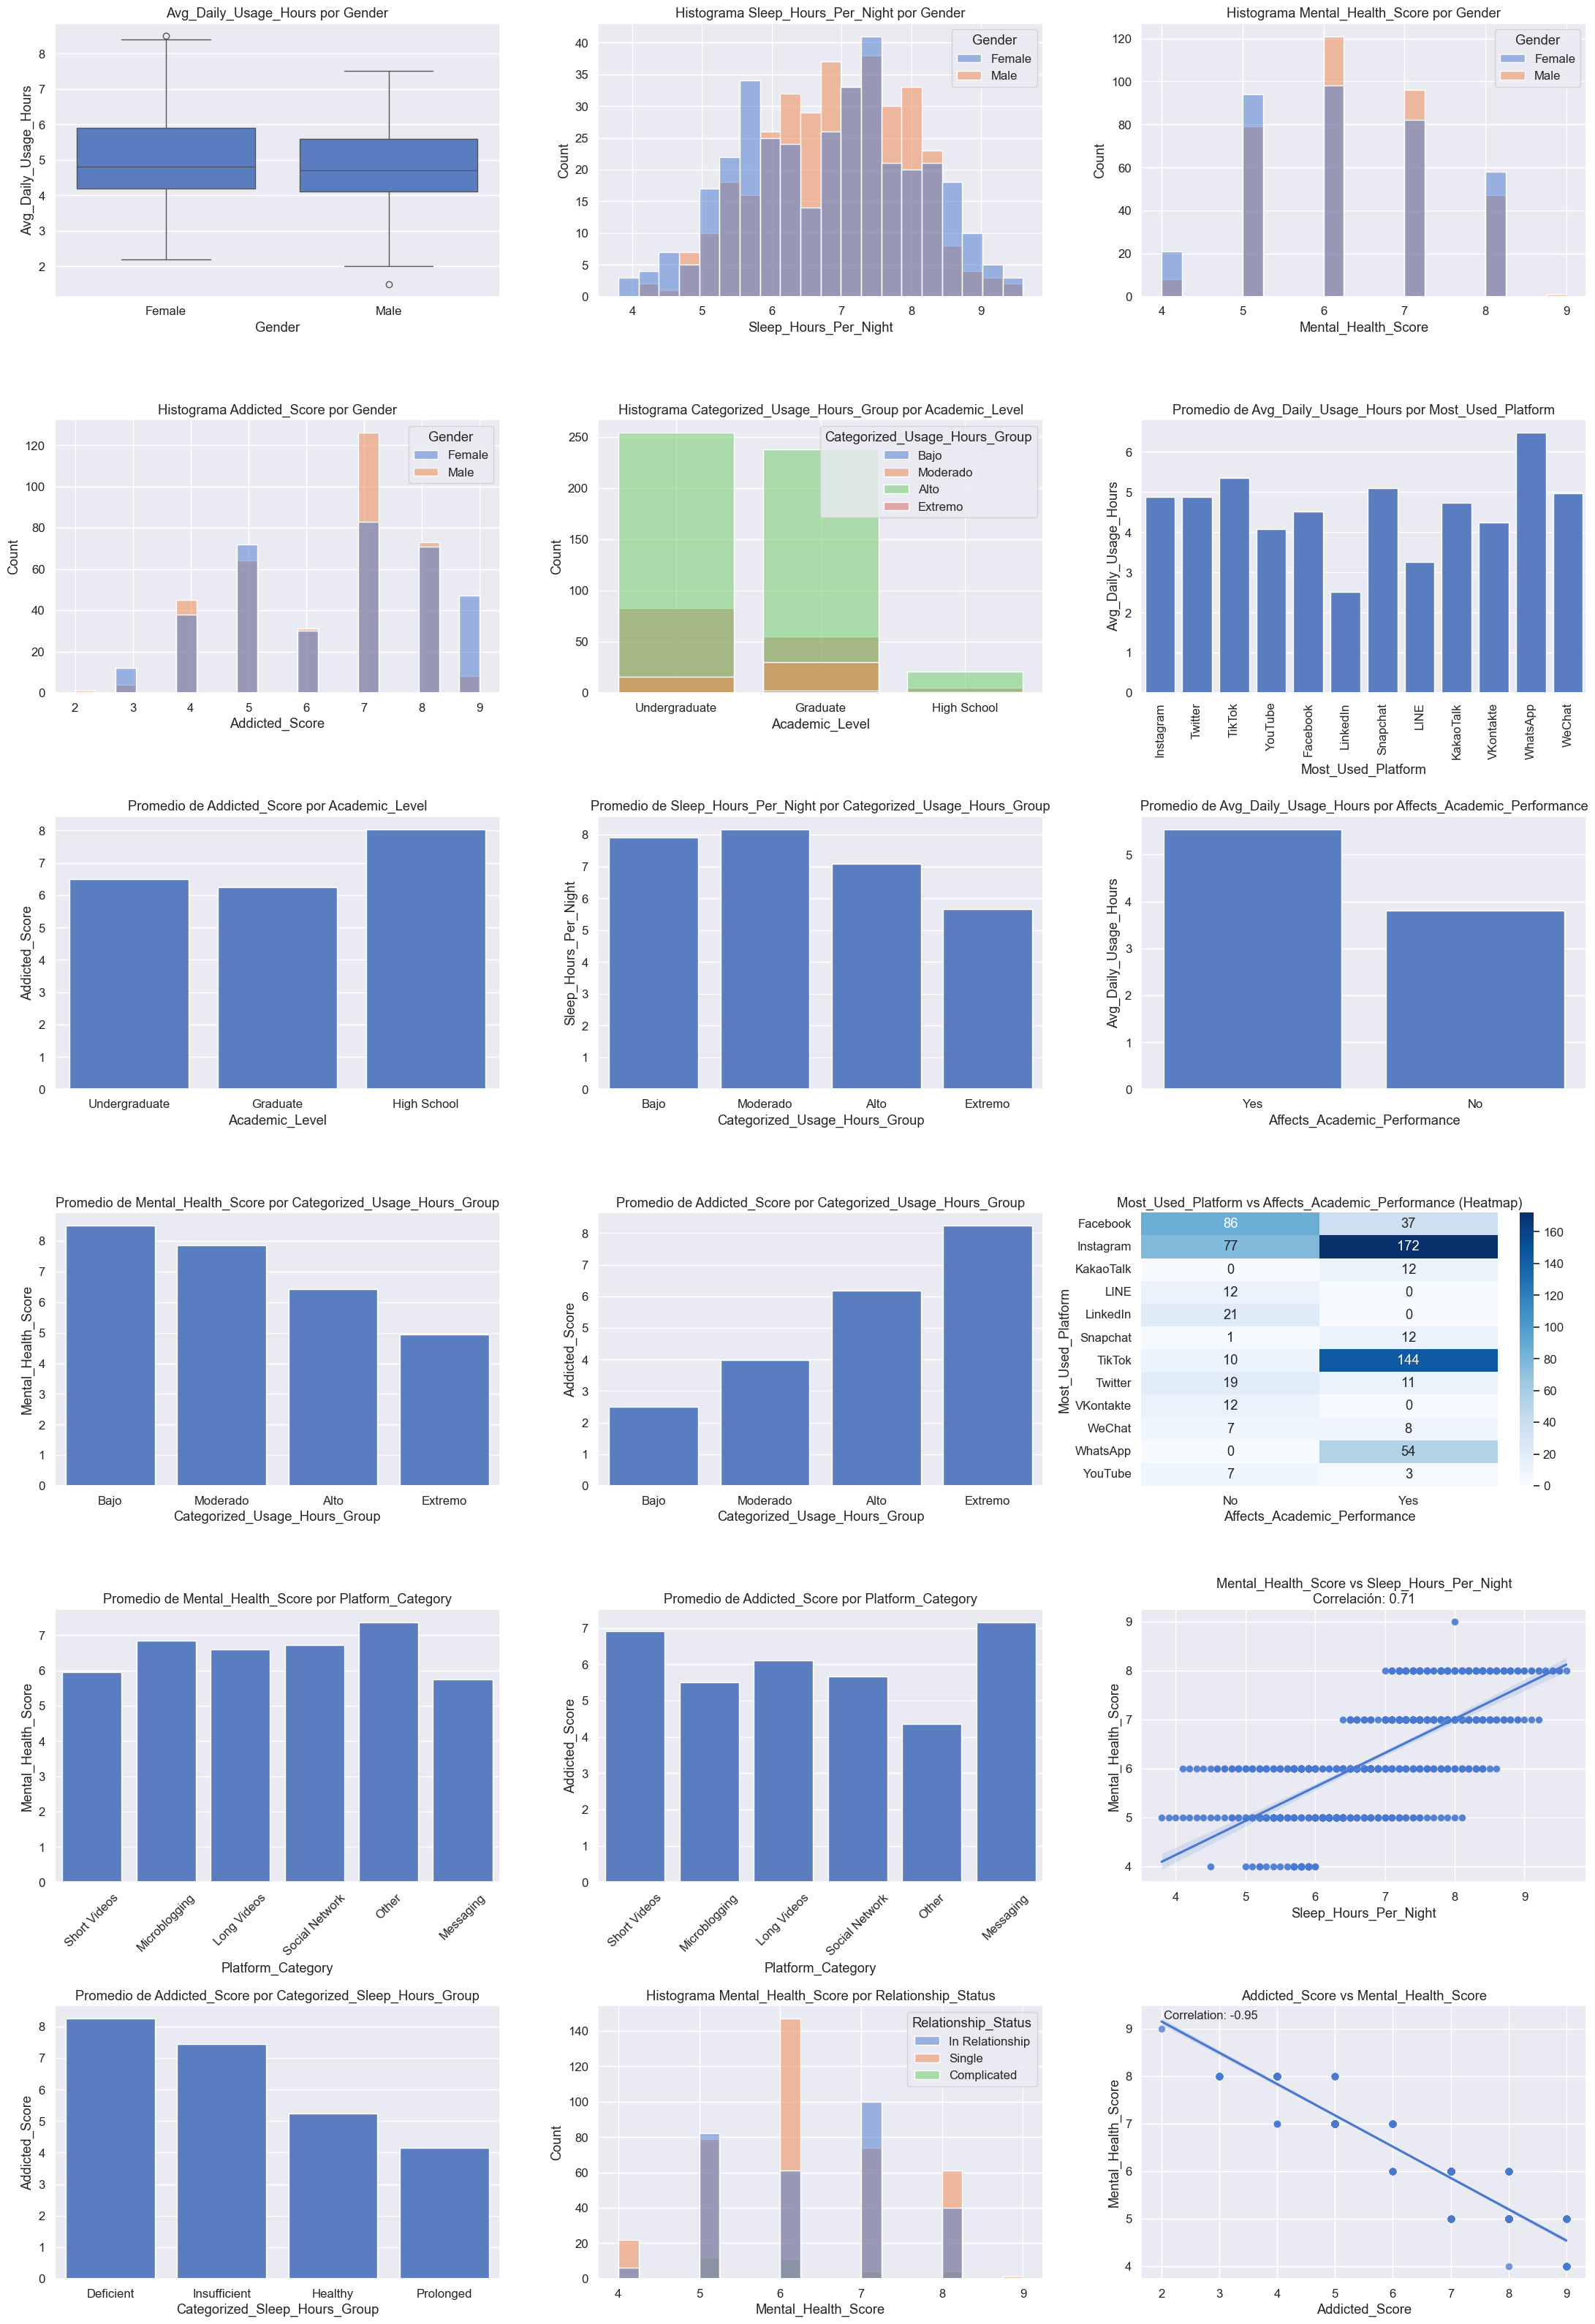

In [52]:
sns.set(style="darkgrid", palette="muted", font_scale=1.1)

fig, axs = plt.subplots(6, 3, figsize=(22, 32))
axs = axs.flatten()

# 1. Gender y Avg_Daily_Usage_Hours (boxplot)
sns.boxplot(x='Gender', y='Avg_Daily_Usage_Hours', data=data, ax=axs[0])
axs[0].set_title('Avg_Daily_Usage_Hours por Gender')

# 2. Gender y Sleep_Hours_Per_Night (histograma)
sns.histplot(data=data, x='Sleep_Hours_Per_Night', hue='Gender', ax=axs[1], bins=20)
axs[1].set_title('Histograma Sleep_Hours_Per_Night por Gender')

# 3. Gender y Mental_Health_Score (histograma)
sns.histplot(data=data, x='Mental_Health_Score', hue='Gender', ax=axs[2], bins=20)
axs[2].set_title('Histograma Mental_Health_Score por Gender')

# 4. Gender y Addicted_Score (histograma)
sns.histplot(data=data, x='Addicted_Score', hue='Gender', ax=axs[3], bins=20)
axs[3].set_title('Histograma Addicted_Score por Gender')

# 5. Academic_Level y Categorized_Usage_Hours_Group (histograma)
sns.histplot(data=data, x='Academic_Level', hue='Categorized_Usage_Hours_Group', ax=axs[4], shrink=0.8, bins=20)
axs[4].set_title('Histograma Categorized_Usage_Hours_Group por Academic_Level')

# 6. Most_Used_Platform y Avg_Daily_Usage_Hours (barplot promedio)
sns.barplot(x='Most_Used_Platform', y='Avg_Daily_Usage_Hours', data=data, ax=axs[5], ci=None)
axs[5].set_title('Promedio de Avg_Daily_Usage_Hours por Most_Used_Platform')
axs[5].set_xticklabels(axs[5].get_xticklabels(), rotation=90)

# 7. Academic_Level y Addicted_Score (barplot promedio)
sns.barplot(x='Academic_Level', y='Addicted_Score', data=data, ax=axs[6], ci=None)
axs[6].set_title('Promedio de Addicted_Score por Academic_Level')

# 8. Categorized_Usage_Hours_Group y Sleep_Hours_Per_Night (barplot promedio)
sns.barplot(x='Categorized_Usage_Hours_Group', y='Sleep_Hours_Per_Night', data=data, ax=axs[7], ci=None)
axs[7].set_title('Promedio de Sleep_Hours_Per_Night por Categorized_Usage_Hours_Group')

# 9. Avg_Daily_Usage_Hours y Affects_Academic_Performance (grouped bar)
sns.barplot(x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', data=data, ax=axs[8], ci=None)
axs[8].set_title('Promedio de Avg_Daily_Usage_Hours por Affects_Academic_Performance')

# 10. Categorized_Usage_Hours_Group y Mental_Health_Score (grouped bar)
sns.barplot(x='Categorized_Usage_Hours_Group', y='Mental_Health_Score', data=data, ax=axs[9], ci=None)
axs[9].set_title('Promedio de Mental_Health_Score por Categorized_Usage_Hours_Group')

# 11. Categorized_Usage_Hours_Group y Addicted_Score (grouped bar)
sns.barplot(x='Categorized_Usage_Hours_Group', y='Addicted_Score', data=data, ax=axs[10], ci=None)
axs[10].set_title('Promedio de Addicted_Score por Categorized_Usage_Hours_Group')

# 12. Most_Used_Platform y Affects_Academic_Performance (heatmap)
ct4 = pd.crosstab(data['Most_Used_Platform'], data['Affects_Academic_Performance'])
sns.heatmap(ct4, annot=True, fmt='d', cmap='Blues', ax=axs[11])
axs[11].set_title('Most_Used_Platform vs Affects_Academic_Performance (Heatmap)')
axs[11].set_xlabel('Affects_Academic_Performance')
axs[11].set_ylabel('Most_Used_Platform')

# 13. Most_Used_Platform y Mental_Health_Score (grouped bar)
sns.barplot(x='Platform_Category', y='Mental_Health_Score', data=data, ax=axs[12], ci=None)
axs[12].set_title('Promedio de Mental_Health_Score por Platform_Category')
axs[12].set_xticklabels(axs[12].get_xticklabels(), rotation=45)

# 14. Most_Used_Platform y Addicted_Score (grouped bar)
sns.barplot(x='Platform_Category', y='Addicted_Score', data=data, ax=axs[13], ci=None)
axs[13].set_title('Promedio de Addicted_Score por Platform_Category')
axs[13].set_xticklabels(axs[13].get_xticklabels(), rotation=45)

# 15. Sleep_Hours_Per_Night y Mental_Health_Score (scatter)
sns.scatterplot(x='Sleep_Hours_Per_Night', y='Mental_Health_Score', data=data, ax=axs[14], alpha=0.7)
axs[14].set_title('Mental_Health_Score vs Sleep_Hours_Per_Night')
correlation1 = data['Sleep_Hours_Per_Night'].corr(data['Mental_Health_Score'])
axs[14].set_title(f'Mental_Health_Score vs Sleep_Hours_Per_Night\nCorrelación: {correlation1:.2f}' )
sns.regplot(x='Sleep_Hours_Per_Night', y='Mental_Health_Score', data=data, ax=axs[14], scatter_kws={'alpha':0.7})


# 16. Categorized_Sleep_Hours_Group y Addicted_Score (bar)
sns.barplot(x='Categorized_Sleep_Hours_Group', y='Addicted_Score', data=data, ax=axs[15], ci=None)
axs[15].set_title('Promedio de Addicted_Score por Categorized_Sleep_Hours_Group')

# 17. Mental_Health_Score y Relationship_Status (histograma)
sns.histplot(data=data, x='Mental_Health_Score', hue='Relationship_Status', ax=axs[16], bins=20)
axs[16].set_title('Histograma Mental_Health_Score por Relationship_Status')

# 18. Mental_Health_Score y Addicted_Score (scatter)
sns.scatterplot(x='Addicted_Score', y='Mental_Health_Score', data=data, ax=axs[17], alpha=0.5)
axs[17].set_title('Addicted_Score vs Mental_Health_Score')
correlation2 = data['Addicted_Score'].corr(data['Mental_Health_Score'])
plt.annotate(f'Correlation: {correlation2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)
sns.regplot(x='Addicted_Score', y='Mental_Health_Score', data=data, ax=axs[17], scatter_kws={'alpha':0.5})


plt.tight_layout()
plt.show()




El análisis bivariado revela un patrón claro: existe una correlación negativa entre las horas de uso de redes sociales y el rendimiento académico percibido. Los estudiantes que pasan más de 5 horas al día en redes sociales, en promedio, consideran que su rendimiento académico se ve afectado. En contraste, aquellos que las usan menos de 4 horas diarias no perciben el mismo impacto negativo. Esto sugiere que el uso prolongado de redes sociales podría ser un factor que influye en el desempeño académico.

- Se observa que en la los tres grupos de estudiantes, la mayoría de ellos usan las plataformas por altas horas al día.

- WhatsApp es la plataforma con mas horas al día en uso para los encuestados.

- Aunque los estudiantes de High School se consideran a sí mismos como los más adictos en promedio, el análisis revela que los estudiantes de Undergraduate pasan proporcionalmente más horas al día en estas plataformas.

- En promedio los estudiantes que pasan mas de 5 horas al día usando redes sociales consideran que estas si afectan su desempeño academico mientras los que pasan en promedio menos de 4 horas dicen que no se ven afectados académicamente. 

- Se puede observar en gráfico de promedio de Mental_Health_Score vs Categorized_Usage_Hours_Group una posible correlacion negativa entre estas dos variables, es decir, entre mas bajo es el consumo de horas al día en redes sociales mas alto es en promedio el puntaje de salud mental, lo que refuerza la idea de que un consumo elevado perjudica el bienestar psicológico.

- Para la grafica que compara las variables Categorized_Usage_Hours_Group vs Addicted_Score se observa una posible correlación positiva, a mas horas de uso de redes sociales el puntaje promedio adicción es mas alto.

- Para la mayoría de los encuestados que dice que el uso de las redes sociales afecta su desempeño academico, Instagram es la red social que mas usan seguida de Tiktok.

- Los estudiantes que usan mas plataformas de video cortos y mensajería mostraron en promedio un puntaje mas bajo en salud mental y un enpromedio un puntaje mas alto en adicción.

- Se puede observar una posible correlacion positiva entre las horas de sueño y el puntaje en salud mental. También es posible ver una correlacion negativa entre las vsriables de puntaje de adicción y el puntaje de salud mental.

- Los estudiantes con calidad de sueño insuficiente y deficiente tienen en promedio un puntaje de adicción mayor al resto de los estudiantes.




In [53]:
data.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Platform_Category,Categorized_Age_Group,Categorized_Sleep_Hours_Group,Categorized_Usage_Hours_Group
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,Short Videos,17-19,Insufficient,Alto
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,Microblogging,22-23,Healthy,Moderado
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,Short Videos,20-21,Deficient,Alto
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,Long Videos,17-19,Insufficient,Moderado
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,Social Network,20-21,Insufficient,Alto


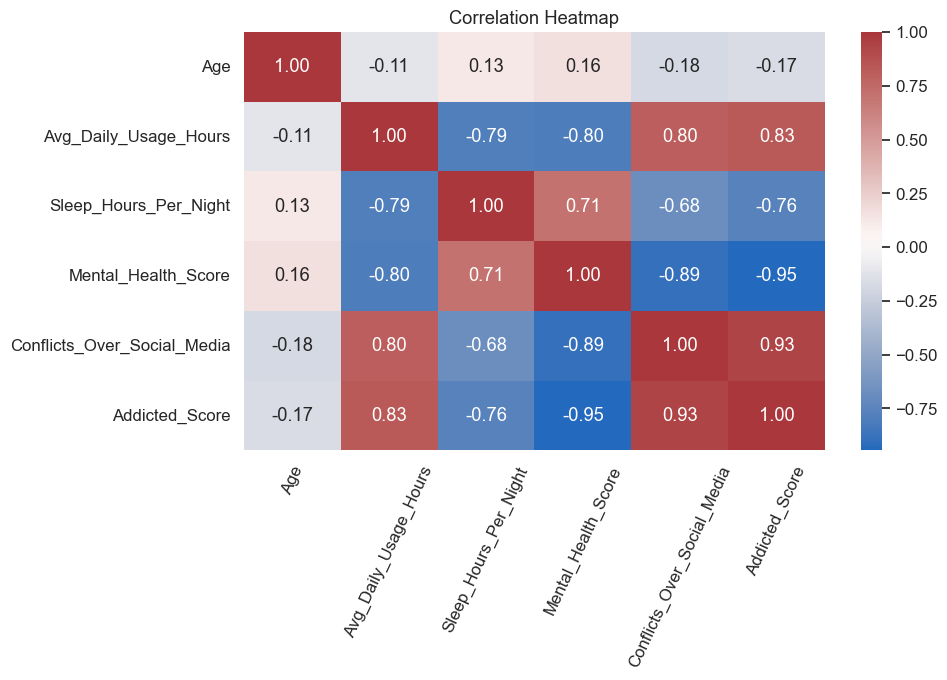

In [54]:
# Matriz de correlaciones

Matrix_columns = ["Age", "Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Mental_Health_Score", "Conflicts_Over_Social_Media", "Addicted_Score"]

plt.figure(figsize=(10, 7))
ax = sns.heatmap(data[Matrix_columns].corr(), annot=True, cmap="vlag", fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

De acuerdo con el análisis exploratorio y bivariado, existe una fuerte evidencia de que el uso prolongado de las redes sociales impacta negativamente la salud mental de los estudiantes. Se han identificado correlaciones significativas entre varias variables clave que respaldan esta conclusión.

Se observa correlaciones entre el puntaje de salud mental, las horas al día en que estos usan estas plataformas, puntaje de adicción, conflictos sobre redes sociales y horas de sueño.

En la siguiente etapa, el análisis multivariado permitirá verificar la fuerza y la naturaleza de estas relaciones de manera más profunda, considerando el efecto combinado de todas estas variables.

## Analisis Multivariado  


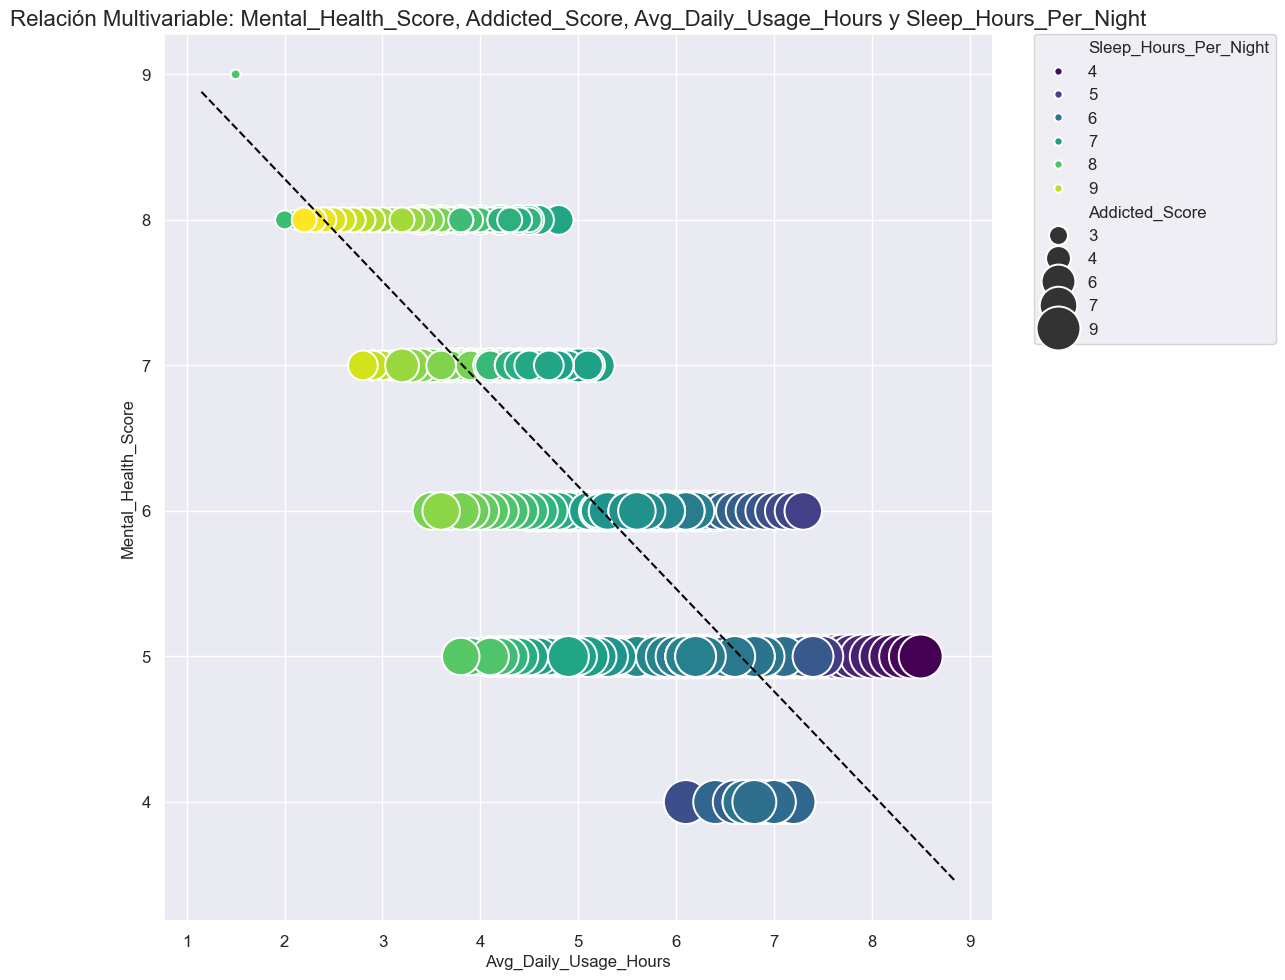

In [55]:
# Scatterplot de las variables Avg_Daily_Usage_Hours, Mental_Health_Score, Addicted_Score y Sleep_Hours_Per_Night

from scipy import stats

plt.figure(figsize=(12, 10))
sns.scatterplot(data=data, x='Avg_Daily_Usage_Hours', y= 'Mental_Health_Score', size='Addicted_Score', hue='Sleep_Hours_Per_Night', palette='viridis', sizes=(50, 1000))

plt.title('Relación Multivariable: Mental_Health_Score, Addicted_Score, Avg_Daily_Usage_Hours y Sleep_Hours_Per_Night', fontsize=16)
plt.xlabel('Avg_Daily_Usage_Hours', fontsize=12)
plt.ylabel('Mental_Health_Score', fontsize=12)

m, b, r_value, p_value, std_err = stats.linregress(data['Avg_Daily_Usage_Hours'], data['Mental_Health_Score'])
x = np.array(plt.gca().get_xlim())
y = m * x + b
plt.plot(x, y, color='black', linestyle='--')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\Mateo\OneDrive\Desktop\FDP\F_ d_P\Taller_3\env\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 91.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mateo\OneDrive\Desktop\FDP\F_ d_P\Taller_3\env\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mateo\OneDrive\Desktop\FDP\F_ d_P\Taller_3\env\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mateo\OneDrive\Desktop\FDP\F_ d_P\Taller_3\env\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

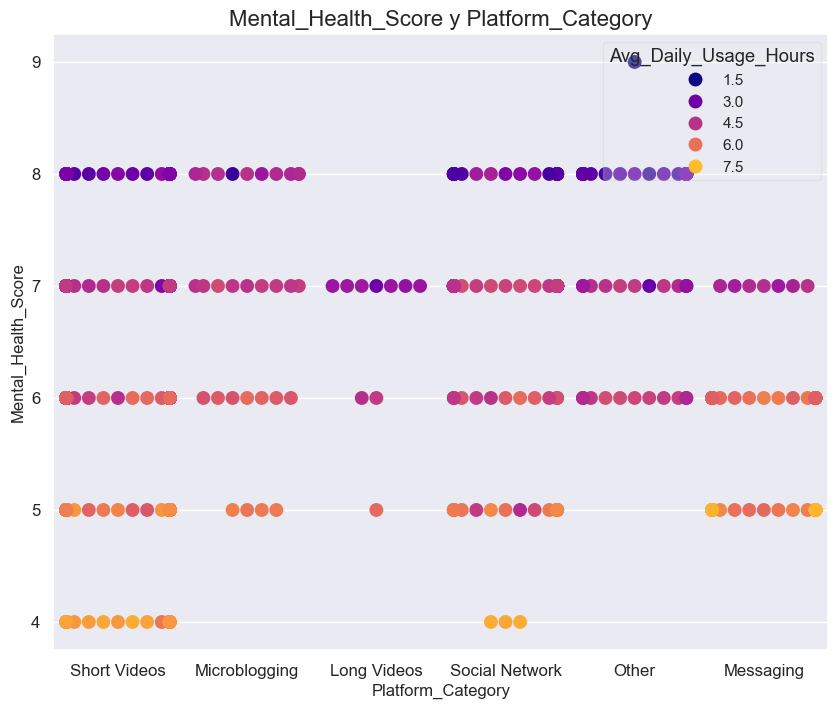

In [56]:
# swarmplot para las variables Platform_Category, Mental_Health_Score y Avg_Daily_Usage_Hours

plt.figure(figsize=(10, 8))
sns.swarmplot(x='Platform_Category', y='Mental_Health_Score', data=data, size=10, hue='Avg_Daily_Usage_Hours', palette='plasma')

plt.title('Mental_Health_Score y Platform_Category', fontsize=16)
plt.xlabel('Platform_Category', fontsize=12)
plt.ylabel('Mental_Health_Score', fontsize=12)
plt.legend(title='Avg_Daily_Usage_Hours', loc='upper right', fontsize='small', framealpha=0.3)
plt.show()

El scatterplot multivariado confirma las relaciones entre las variables clave de estudio. Se observa una clara correlación negativa entre el uso de redes sociales y la salud mental, así como con las horas de sueño. A medida que las horas de uso diario  aumentan (los puntos se mueven hacia la derecha del gráfico), el puntaje de salud mental disminuye y las horas de sueño se reducen, como lo indica el oscurecimiento de los puntos.
Aunque la matriz de correlación muestra un vínculo positivo y fuerte entre las horas de uso y el puntaje de adicción, el scatterplot no logra visualizar esta correlación de manera tan evidente. Esto puede deberse a la superposición de datos.

El swarmplot ofrece una visión crítica sobre el impacto de los videos cortos en la salud mental. Se puede inferir que el consumo elevado de este tipo de plataformas está directamente relacionado con un menor puntahe de salud mental. La visualización muestra que, en el grupo de usuarios de videos cortos, las puntuaciones de salud mental más bajas se asocian con los puntos de color más amarillo, lo que sugimuestra una posible respuesta a la pregunta de investigación inicial.

Estos hallazgos multivariados proporcionan evidencia sólida de que el consumo de largas horas de redes sociales está correlacionado con una peor salud mental y un sueño deficiente y que las plataformas de video corto podrían ser un factor influyente en la salud mental.


## Conclusiones  

Respuestas a las preguntas iniciales.

- La matriz  de correlaciones y el analisis multivariado demuestran una fuerte correlacion entre la salund mental, las horas de uso al día de las redes sociales y las horas de sueño de los estudiantes encuestados. En términos simples, a medida que los estudiantes dedican más tiempo a las redes sociales, sus puntuaciones de salud mental disminuyen y las horas de sueño se reducen.

- El análisis de histogramas sobrepuestos por genero y la prueba t-student no revela diferencias en el puntaje de salud mental de los estudiantes encuestados por genero debido al uso de plataformas, es decir no hay diferencias estadisticamnete significativas de que un genero se ve mas afectado que otro, sin embargo, si se evidencia que la salud mental se ve afectada a mas uso de redes sociales en los dos generos. Esto sugiere que el deterioro del bienestar psicológico por el uso prolongado de estas plataformas afecta a ambos géneros de los estudiantes encuestados por igual.

-  De acuerdo a la matriz de correlacion, el scatterplot al histograma donde se comparan las variables Sleep_Hours_Per_Night y Avg_Daily_Usage_Hours se muestra una relacion fuerte para los estudiantes encuentados donde se observa que a mas uso por horas de plataformas redes sociales la cantidad de sueño disminuye. Lo anerior respalda y confirma la pregunta inicial que el uso prolongado al día de las redes sociales afecta las horas de sueño en los estudiantes encuestados

- Desde un inicio se quería validar el impacto de plataformas de video cortos en la salud mental. En la redes sociales muchos influencer de salud mental recomiendan limitar el uso de este tipo de plataformas (Instagram y Tiktok) asi que se decidio comparar en una gráfica swarmplot las variables que relacionan el puntaje de salud mental, las horas de uso al día de las plataformas de redes sociales y el tipo de plataforma mas usada. Tambien se comparo estas variables en la parte de analisis bivariado con histogramas y graficos de barras para verificar que efectivamente se evidencia una disminucion mas marcada en el puntaje de la salud mental de los estudiantes encuestados a mas horas de uso al día de plataformas de video corto. Se puede concluir que a mas uso de plataformas de video corto afecta mas la salud mental que el uso de otros tipo de plataformas.

### Recomendaciones

De acuerdo a la evidente relacion demostrada en el uso prolongado al día de las redes sociales, la baja puntacion en salud mental y las bajas horas de sueño al día en los estudiantes encuestados, se recomienda limitar el uso de las horas en las redes sociales al día (en especial las plataformas de video corto) de bajo o moderado, ya que los diferentes análisis demuestran que los estudiantes que estan dentro de estas dos categorías tienen en promedio puntuaciones mas altas en salud mental y duermen mas horas al día que el resto de la poblacion estudiada. De acuerdo a lo enfatizado a través de estudios por diversas organizaciones de salud (como la OMS) es importante que los estudiantes tengan buena salud mental y sueño adecuado ya que estos influyen en su desarrollo cognitivo y rendimiento academico.